In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

2 Загрузите набор данных фильмов в pandas

In [10]:
df = pd.read_csv("movies.csv")
df.head()


,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [13]:
df.tail()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008
76,(500) Days of Summer,comedy,Fox,81,8.096000,87,$60.72,2009


In [14]:
df.sample(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
76,(500) Days of Summer,comedy,Fox,81,8.096000,87,$60.72,2009
61,He's Just Not That Into You,Comedy,Warner Bros.,60,7.153600,42,$178.84,2009
13,The Ugly Truth,Comedy,Independent,68,5.402632,14,$205.30,2009
60,High School Musical 3: Senior Year,Comedy,Disney,76,22.913136,65,$252.04,2008
37,Nick and Norah's Infinite Playlist,Comedy,Sony,67,3.352729,73,$33.53,2008


3 Перечислите все столбцы набора данных и изучите их типы. Изучите статистику по различным областям. 
Опишите, какие данные у нас есть

In [25]:
#В таблиці 8 стовпчиків
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [27]:
# Наша таблиця містить фільми в розрізі жанру, студії, оцінки аудиторії (int64), прибутковості (float64), 
# рейтингу Rotten Tomatoes (int64), світового збору (на диво є object) і року виписку (int64). Всі стовпці заповнені.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [28]:
# Базова статистика: взято фільми за 2007-2011 р.р. Оцінка аудиторії варіюється від 35% до 89%, в середньому - 63,7%.
# Прибутковість від 0 до 66,9, в середньому - 4,6. Середній рейтинг по Rotten Tomatoes - 46,7% (від 26% до 96%)
df.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


4 Сколько всего фильмов в наборе данных?

In [29]:
# В таблиці 77 фільмів
len(df)

77

In [30]:
# Розмір таблиці: 77 рядків, 8 стовпців
df.shape

(77, 8)

5 Сколько фильмов содержится в наборе данных за каждый год?

In [34]:
#Найбільше фільмів в таблиці за 2008 та 2010 роках - по 20. Найменше - за 2007 р - 11 шт.
film_for_year = df.groupby('Year')['Film'].count()
print(film_for_year)

Year
2007    11
2008    20
2009    12
2010    20
2011    14
Name: Film, dtype: int64


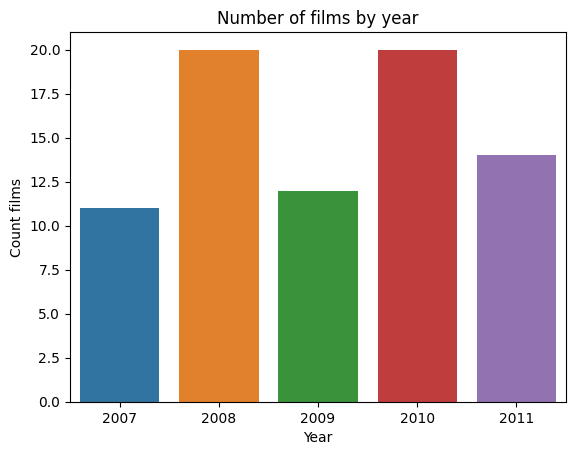

In [44]:
#Візуалізація завдання.
sns.countplot(data=df, x='Year')
plt.ylabel('Count films')
plt.title('Number of films by year')
plt.show()

6 Покажите подробную информацию о наименее и наиболее прибыльных фильмах в наборе данных

In [52]:
#Інформація щодо 5 найбільш прибуткових фільмів
df.sort_values('Profitability', ascending=False).head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
68,Fireproof,Drama,Independent,51,66.934000,40,$33.47,2008
60,High School Musical 3: Senior Year,Comedy,Disney,76,22.913136,65,$252.04,2008
14,The Twilight Saga: New Moon,Drama,Summit,78,14.196400,27,$709.82,2009
7,Waitress,Romance,Independent,67,11.089742,89,$22.18,2007
12,Twilight,Romance,Summit,82,10.180027,49,$376.66,2008


In [53]:
#Інформація щодо 5 найменш прибуткових фільмів
df.sort_values('Profitability', ascending=True).head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
33,Our Family Wedding,Comedy,Independent,49,0.000000,14,$21.37,2010
57,Jane Eyre,Romance,Universal,77,0.000000,85,$30.15,2011
8,Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011
42,Miss Pettigrew Lives for a Day,Comedy,Independent,70,0.252895,78,$15.17,2008


7 Значение «Жанр» временами кажется непоследовательным; попробуйте найти эти несоответствия и исправить их

In [57]:
#Подивимось всі унікальні значення в стовпчику Genre
df['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Romence',
       'Comdy', 'Action', 'romance', 'comedy'], dtype=object)

In [58]:
#Виправимо невірно введені значення
df = df.replace({'Genre':{'Romence':'Romance', 'romance':'Romance', 'Comdy':'Comedy', 'comedy':'Comedy'}})

In [59]:
#Перевіримо тепер чи все змінили
df['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Action'],
      dtype=object)

<Axes: xlabel='Genre', ylabel='count'>

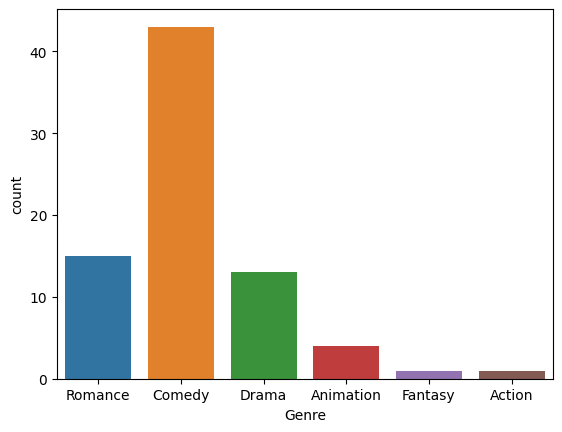

In [60]:
sns.countplot(data=df, x='Genre')

8 Сохраните (в новый файл CSV) 10 лучших комедий по количеству зрителей; покажите только название фильма, год и студию

In [89]:
comedy = df[df['Genre'] == 'Comedy'].sort_values(['Audience score %'], ascending=False)
comedy10 = comedy.iloc[:10, [0, 2, 7, 3]]
comedy10.to_csv('Top10_max_audience_score.csv', index=False)


9 Используйте pip для установки двух библиотек: lxml, MySQL-connector-python

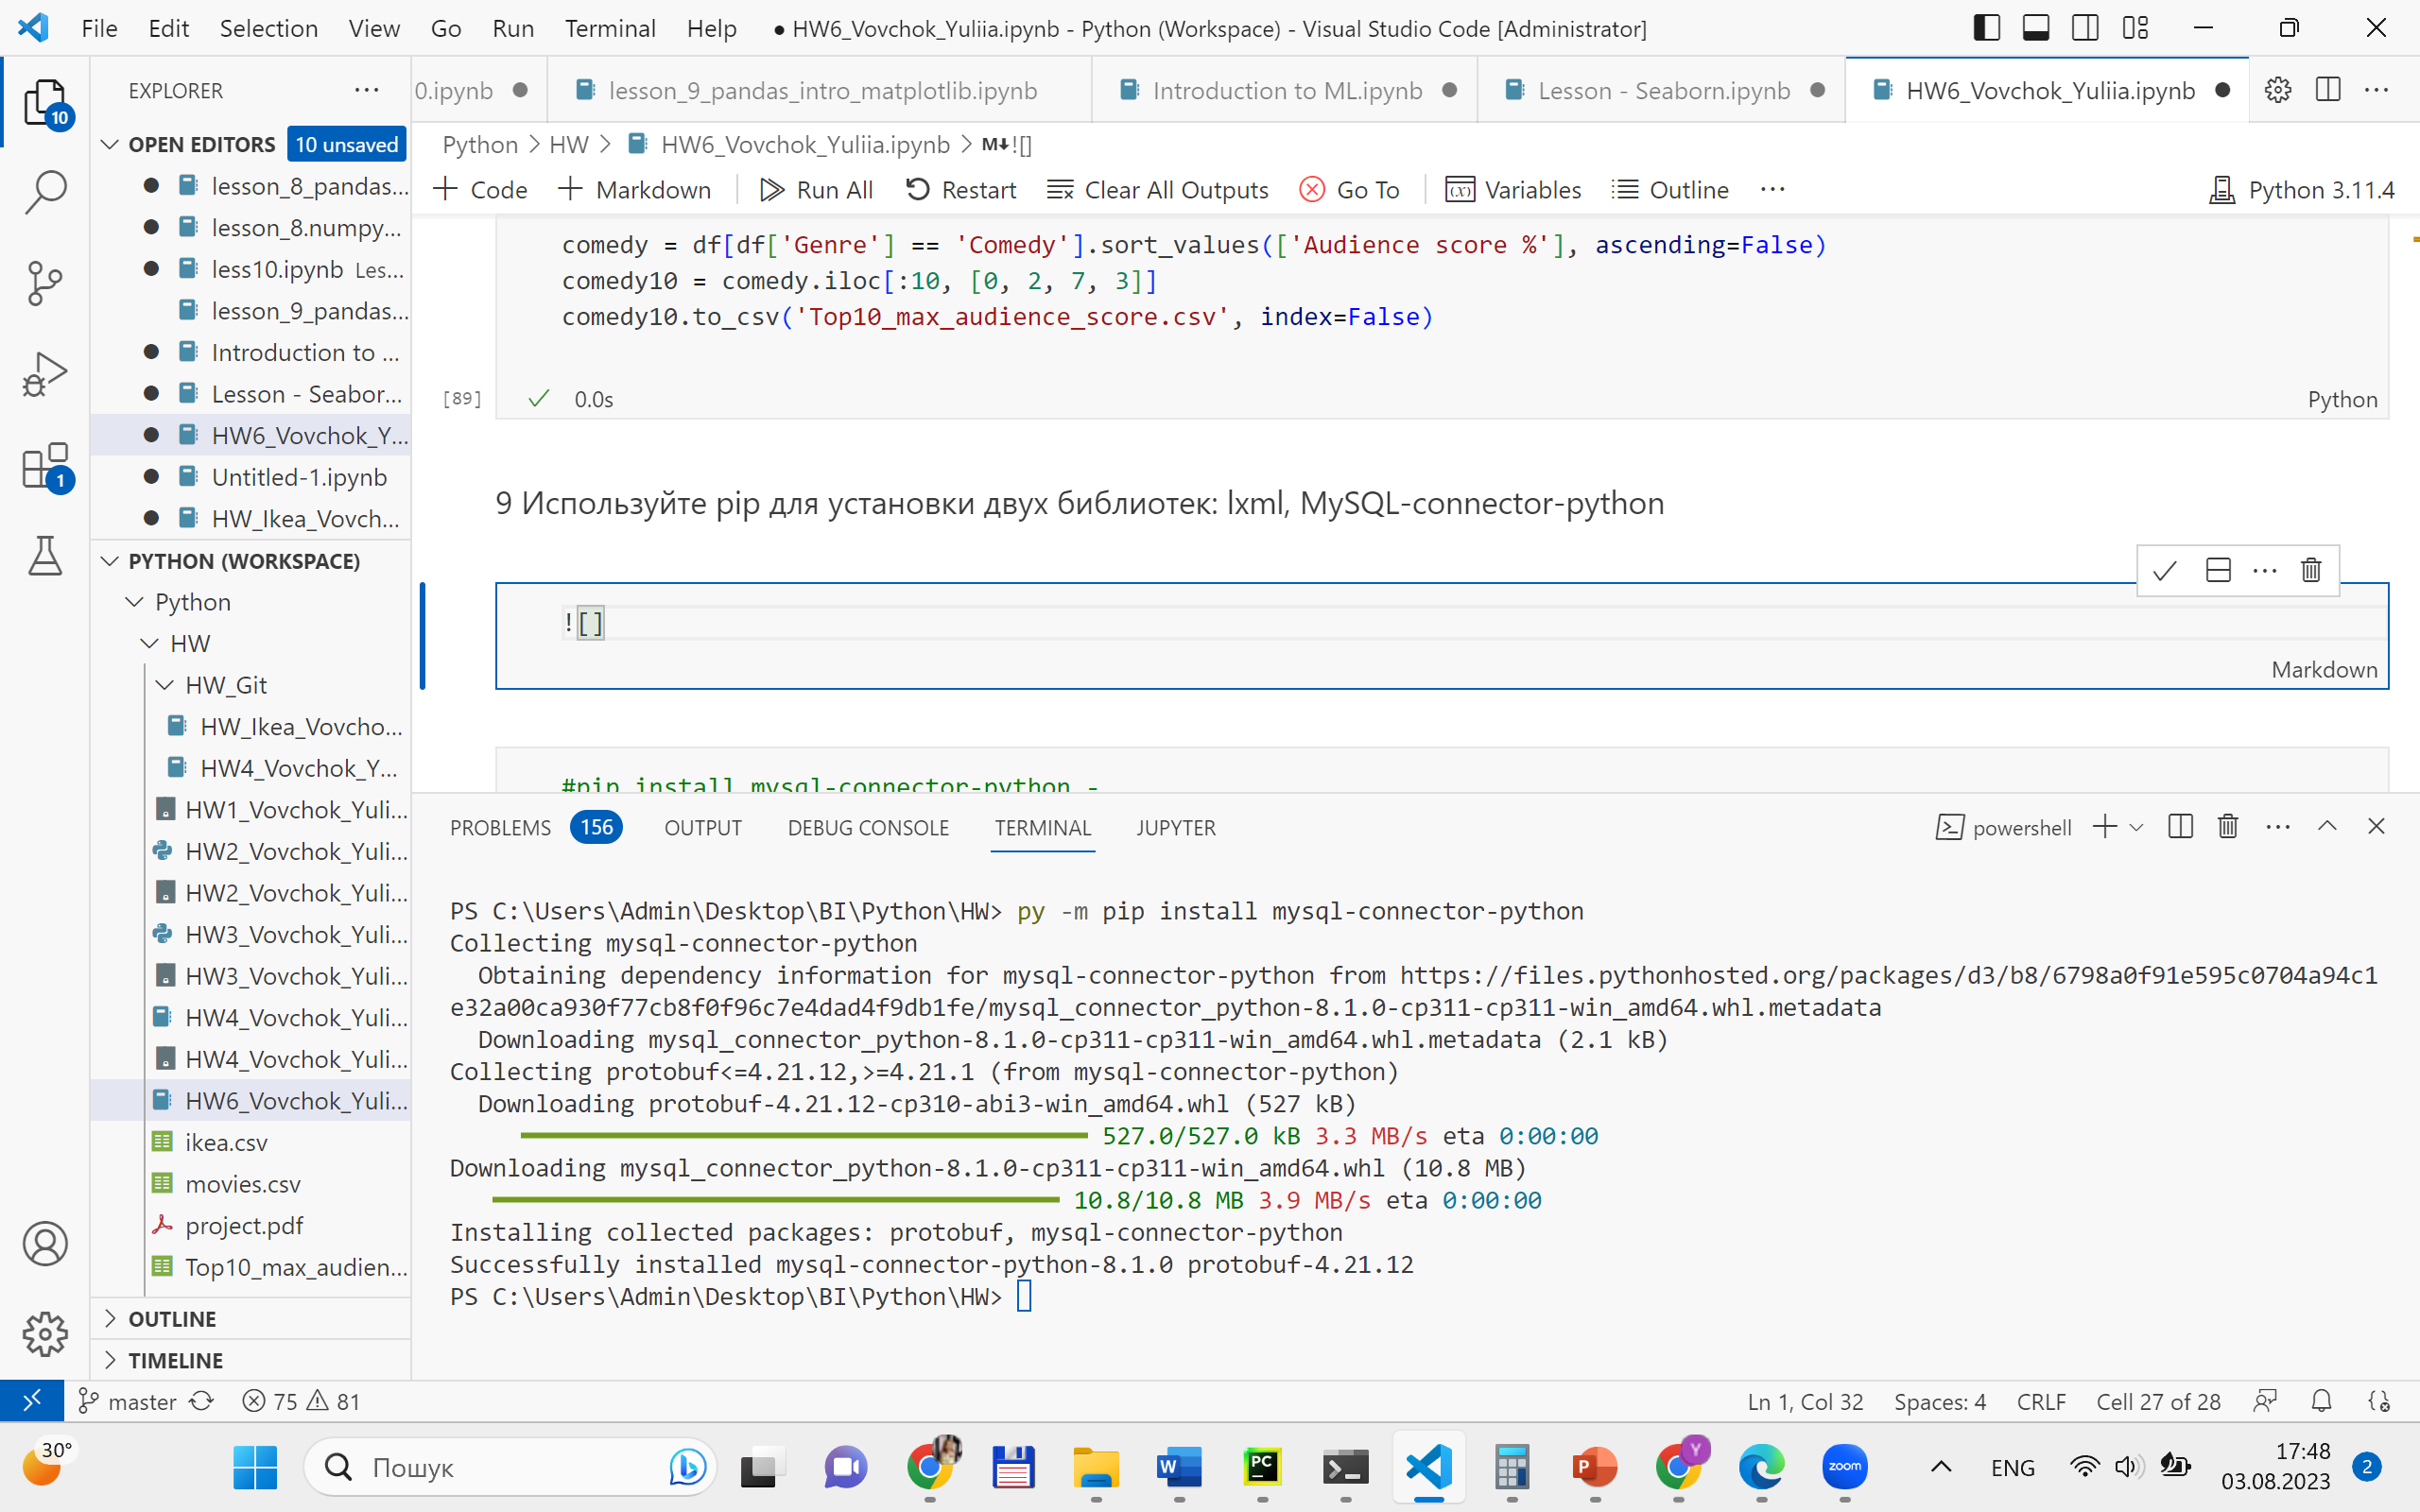

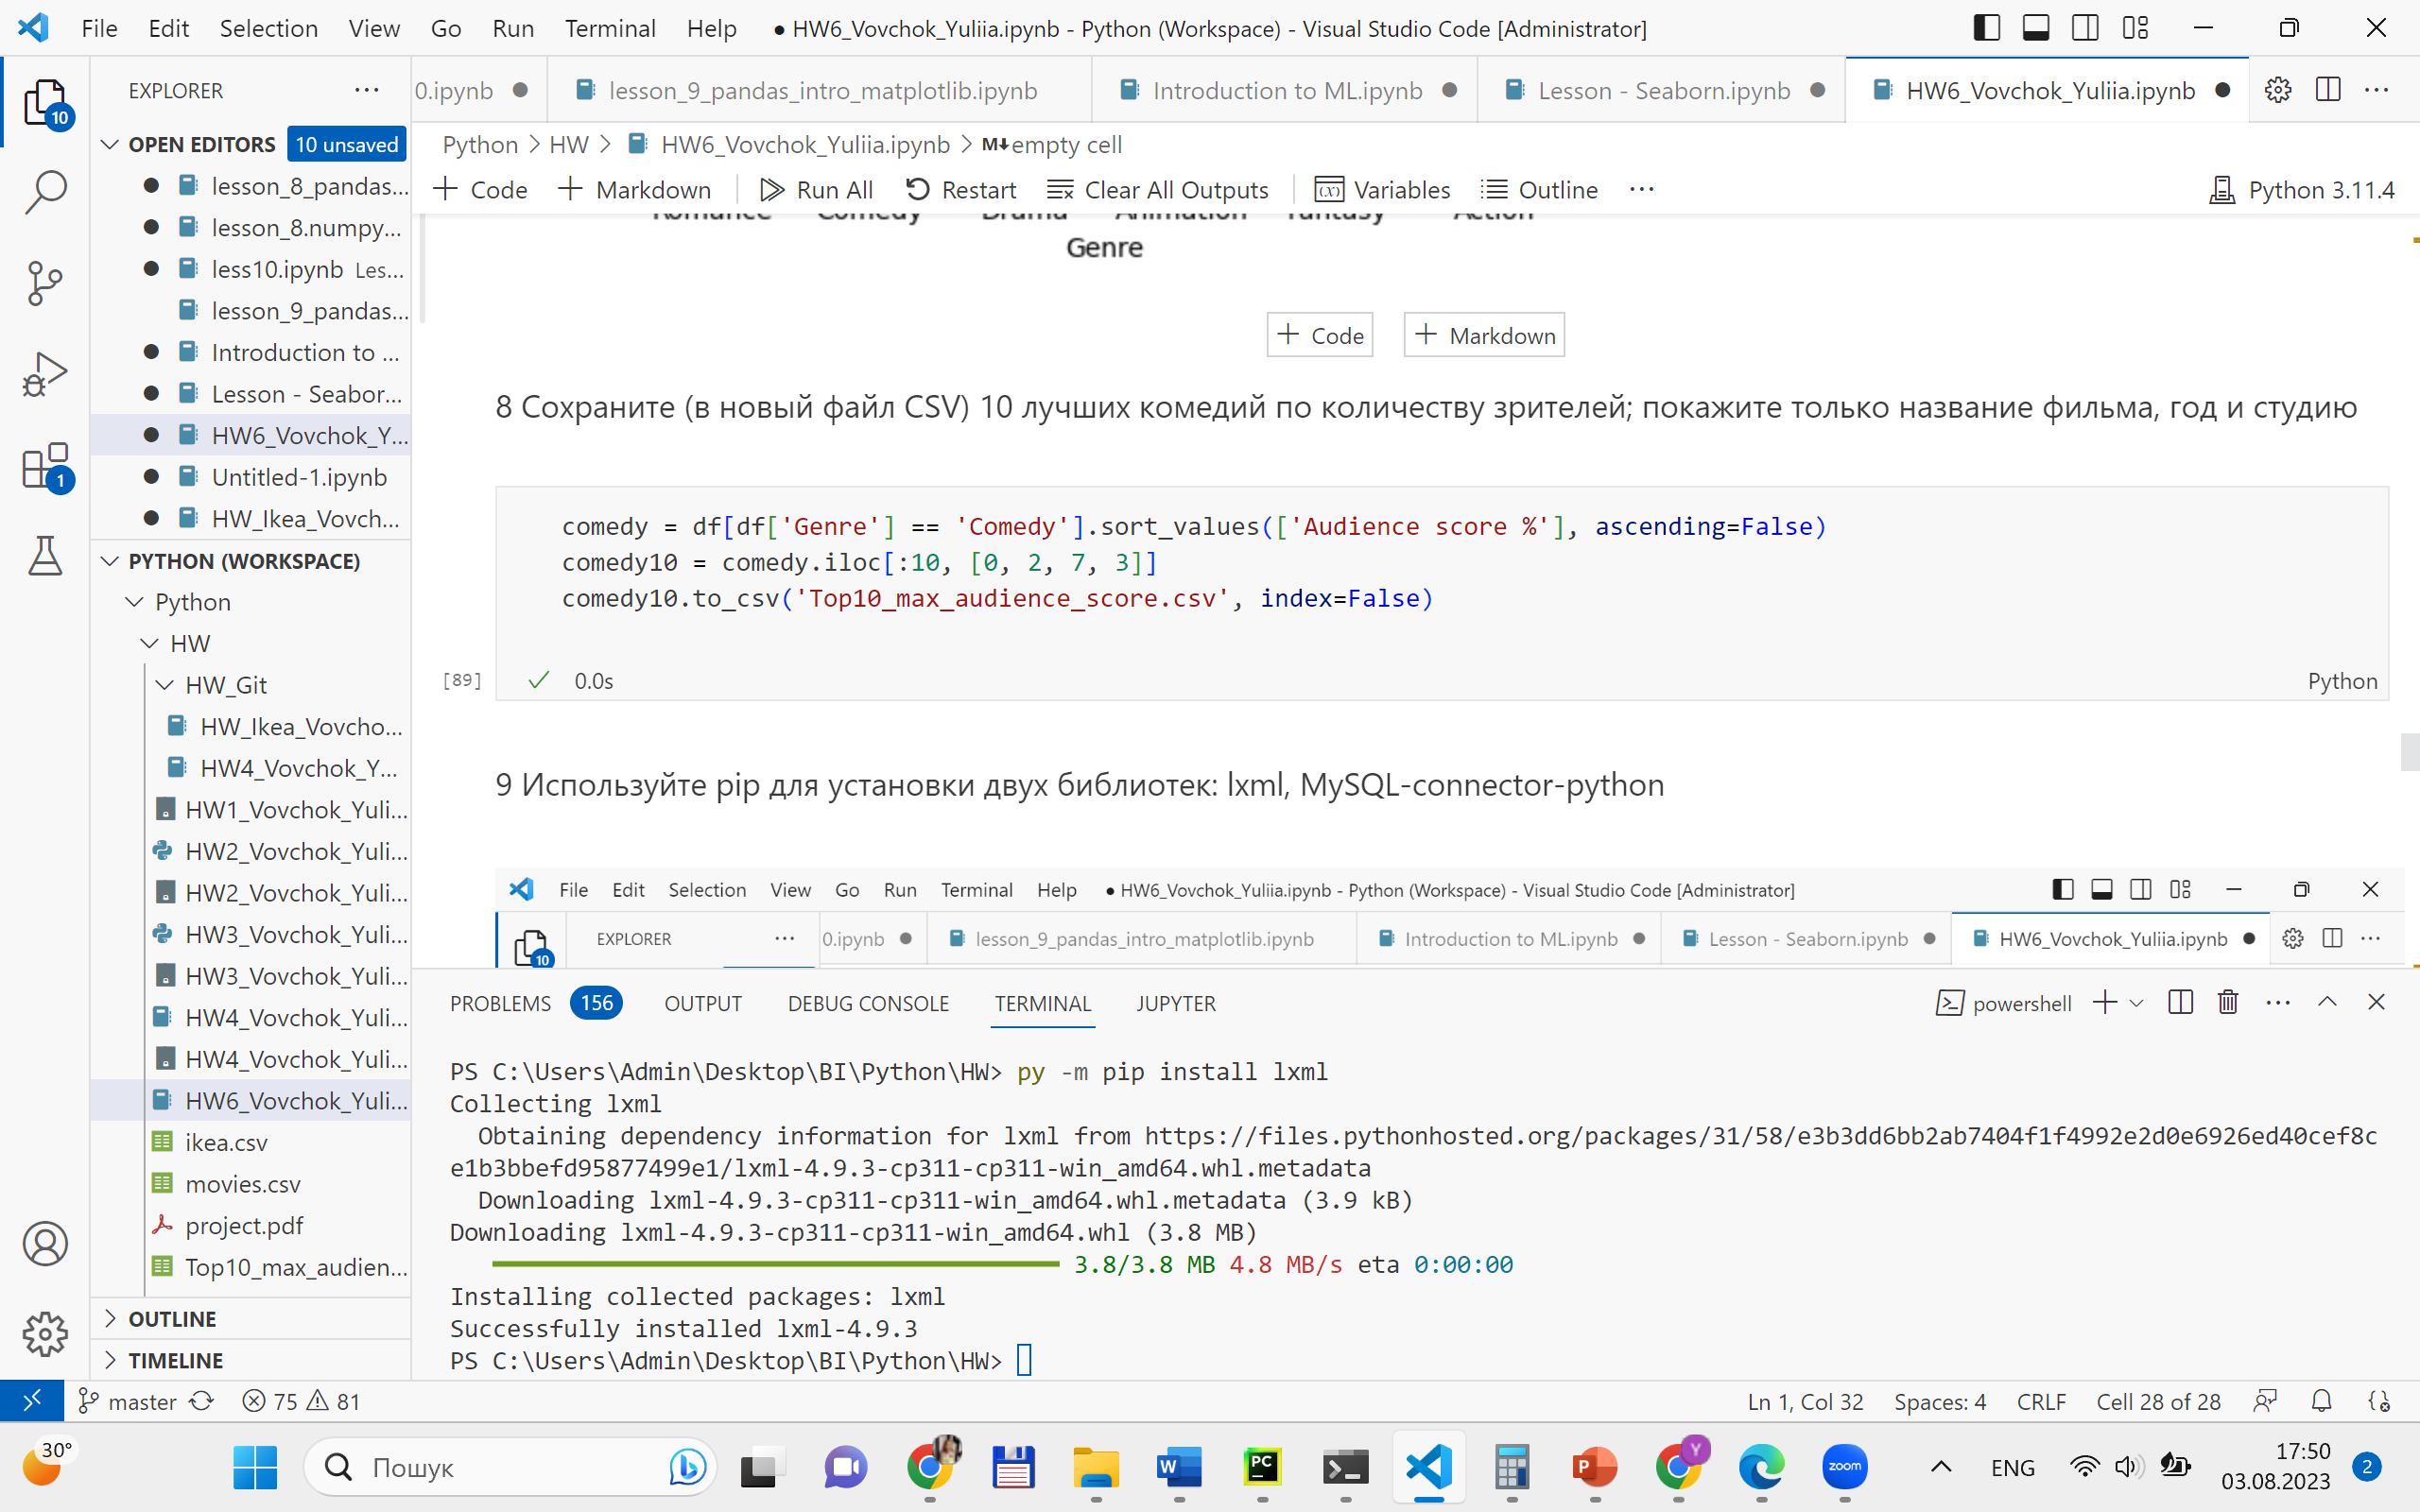